**Project1**: Extraxt the moving object pixcles and perform the curve fitting on object's centroid coordinate points.


Note: If you are using google colab, run the following cell:

1)Mount your drive if you are using google colab. Make sure to change the FOLDERNAME in the following cell

2) Run following cell

In [1]:
# try:
#     from google.colab import drive
#     drive.mount('/content/drive', force_remount=True)
#     FOLDERNAME =  "ENPM673/project1/"
#     assert FOLDERNAME is not None, "[!] Enter the foldername."
#     %cd drive/My\ Drive
#     %cd $FOLDERNAME
# except ModuleNotFoundError as ex:
#     print("Please run this snippet in Google Colab")

In [2]:
# Importing Dependencies
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'cv2'

Assumption : Since object is Black, only black pixle (pixle value = zero) are only extracted. Since there is black shadow in video in some of the frame, so to avoid that I have not used any range for black shade.

Can't receive frame (stream end?). Exiting...


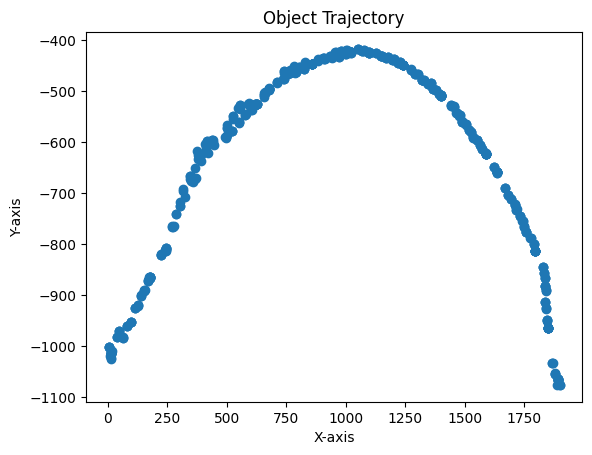

In [ ]:
# code to capture and extract object from the video

# Define video file path
video_path = "object_tracking.mp4"   # defining the video_path for the particular video

# Create VideoCapture object
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Array to store centroid coordinates
centroid_object = np.empty((0, 2), dtype=int)  # array to save centroid points of each frame

# Loop through frames
while True:
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting...")
        break

    # Capture and save particular frame
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == 300:
      ret , capture_frame = cap.read()
      # cv2.imwrite("captured_object_image.jpg", capture_frame )  # uncomment the command to save the image to directory
      # print("Frame saved successfully!")

    # Find zero elements (black pixels - black object)
    zero_elements = np.where(frame == 0)

    # Convert zero_elements to list of coordinates
    object_points = list(zip(*zero_elements))              # array created to save coordinates of all the pixcle having zero value (balck object) for partcular frame

    # Calculate centroid by taking average of all x coordinates and y coordinates
    if object_points:  # Check if object_points is not empty
        avg_x = np.mean(object_points, axis=0)[0]  # Extract x-coordinate
        avg_y = np.mean(object_points, axis=0)[1]  # Extract y-coordinate
        centroid_object = np.vstack([centroid_object, [avg_x, avg_y]])  # Append to array

    # cv2_imshow(resized_frame)   ## to display images

    # # Exit loop if 'q' is pressed
    # if cv2.waitKey(1) == ord("q"):
    #     break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Plot centroid coordinates
# #axis fliped to account of origin to be at bottom-left corner
y = centroid_object[:, 0]
x = centroid_object[:, 1]

# since the image first pixcle is (0,0), is in top-left corner
# But in matplot the (0,0) starts from bottom-left corner, therfore y coordinates are taken as negative
# to keep the centroid curve facing downward, similarly to projectile motion in video
plt.scatter(x, -y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Object Trajectory")
plt.show()
# print('trajactory points', centroid_object)
# print("number of way points", len(centroid_object))   # to check how many centroid points are extracted



In [ ]:
# cv2_imshow(capture_frame)   # to check saved capture_frame

Curve Fitting:

Since the object is in projectile motion, we will use parabloc equation for curve fitting.

Quadratic equation: aX**2 + bX + c

Matrices involved: Y, X, B

B = [a ,b ,c ]
Xi = array contaning Xi coordinates of the centroids

X21 = array contains squared elements of Xi array

X = [X21 , Xi, 1]

Y = array containing Yi coordinates of centroids
To find the best curve that fits our centroid points, optimal values of parameter a,b,c has to be found.
B = inverse_(Xy_X)* (Xt_Y)



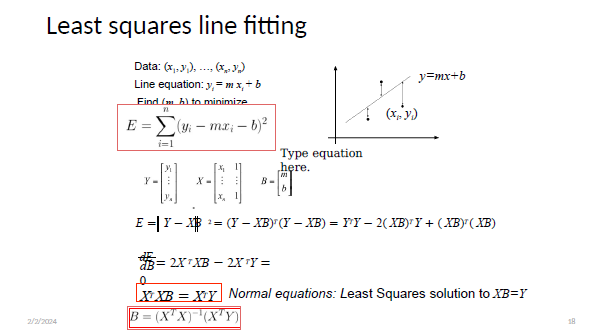

In [ ]:
# Curve fitting on the centroid-pixle coordinates to find the function
# "Standard Least Square" to fit a curve

# plot the centroid_object matrix
print("shape of centroid_object array", centroid_object.shape)

#quadratic equation: y = ax^2 + bx + c

# Y array containing Yi coordinates of curve
Y= np.array(centroid_object[:, 0])
Y = Y.reshape(-1,1)
print("Y shape",Y.shape)
# Xi array contains Xi coordinates of curve
Xi = np.array(centroid_object[:, 1])
Xi = Xi.reshape(-1,1)
print("X1 shape",Xi.shape)

# X2 array is combination of squared(Xi) array, Xi array and constant one.
X2i = np.square(Xi)   # X2i array is squared elements of Xi array
# print("x2:", X2)
print("X**2 shape", X2i.shape)
# print("X**2 dimension", X2i.ndim)
# X = np.array([X2,X1,1])
constant = np.ones(len(Xi),)
constant = constant.reshape(-1,1)
print("constant array shape", constant.shape)

X = np.hstack((X2i, Xi, constant))
X = X.reshape(-1,3)
print("combined X shape",X.shape)

# print("X",X)
Xt_X_product = np.dot(X.T,X)
print("Xt_X_product shape", Xt_X_product.shape)

Xt_X_inverse = np.linalg.pinv(Xt_X_product)
# psedu_inverse_xTX =
# product_ xTy =
# B = np.dot(psedu_inverse_xTX, product_xTy)
# pinverse
xTy = np.dot(X.T , Y)
B = np.dot(Xt_X_inverse ,xTy)
a=B[0]
b=B[1]
c=B[2]
# trajactory_eq_curve_fitting = np.dot(a, X2) + np.dot(b,X) + c

print("B matrix : [a ,b ,c]:", a ,b ,c)

shape of centroid_object array (517, 2)
Y shape (517, 1)
X1 shape (517, 1)
X**2 shape (517, 1)
constant array shape (517, 1)
combined X shape (517, 3)
Xt_X_product shape (3, 3)
B matrix : [a ,b ,c]: [0.00066913] [-1.32285044] [1066.06718495]


In [ ]:
# part5: given that x axis value is 1000, find the y axis value for calculated equa􀆟on in part 4.
# trajactory_equation = a*(x**2) + b*x + c
def trajactory_coordinates(x_value):
  # input can be x or y value
  trajactory_equation = a*(x_value**2) + b*x_value + c   # this equation is generated considering the coordinate(0,0) is in top-left corner of the image.
  y_value= trajactory_equation
  print("y coordinate for given x, from the equation:", trajactory_equation)
  return

y_value = trajactory_coordinates(1000)      # question 5: given X_value = 1000



y coordinate for given x, from the equation: [412.35114482]


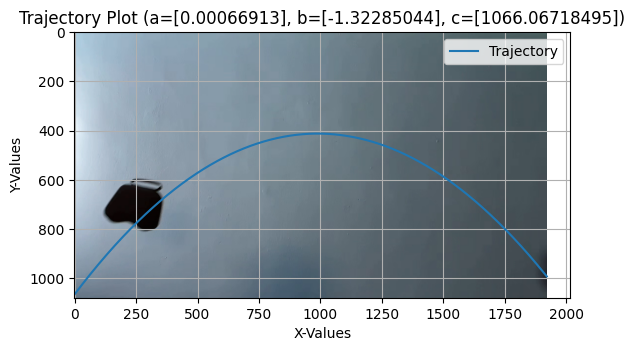

In [ ]:
# part6: plotting the curve fitting equation

height , width , channel = capture_frame.shape
# print(capture_frame.shape)
# width = 1920
# Create x-values for the desired range
x_values = np.linspace(0, width, 1500)  # 1500 points for smooth curve

# Calculate corresponding y-values using the trajectory equation
y_values = ( a * x_values**2 + b * x_values + c)

# Create the plot
plt.imshow(capture_frame)
plt.plot(x_values, y_values, label="Trajectory")

plt.xlabel("X-Values")
plt.ylabel("Y-Values")
plt.title("Trajectory Plot (a={}, b={}, c={})".format(a, b, c))  # Include coefficients in title
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# code completed